In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pdr
from astropy.visualization import ZScaleInterval
from gPhoton.lightcurve.photometry_utils import (mask_for_extended_sources,
                                                 image_segmentation,
                                                 check_point_in_extended)
from gPhoton.coadd import zero_flag_and_edge, flag_and_edge_mask
import scipy.sparse
import pandas as pd
import numpy as  np
from gPhoton.lightcurve._steps import get_point_and_extended_sources
from ast import literal_eval

In [2]:
image_data = pdr.read('/Users/cm/github/gPhoton2/regr_test_data/e08556/e08556-nd-ffull-b00-image-r.fits')
expt = pd.read_csv('/Users/cm/github/gPhoton2/regr_test_data/e08556/e08556-nd-f0120-b00-movie-exptime.csv',index_col=None)
exptime = expt['expt'].sum()

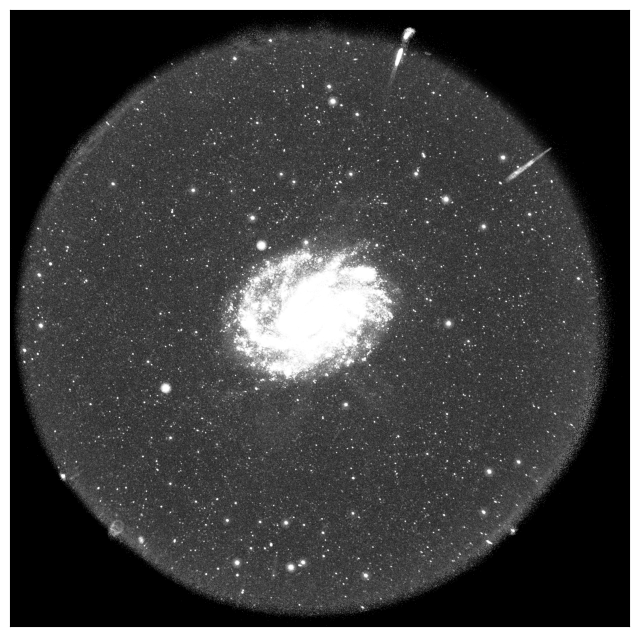

In [3]:
plt.figure(figsize=(8,8))
plt.imshow(ZScaleInterval()(image_data['CNT']),origin='lower',cmap='Greys_r')
plt.xticks([]);plt.yticks([]);
plt.show()

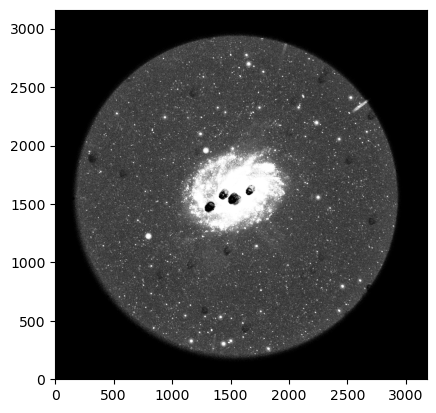

In [4]:
masked_cnt_image = zero_flag_and_edge(
    image_data["CNT"],
    image_data["FLAG"],
    image_data["EDGE"],
    copy=True
) / exptime
masked_cnt_image = masked_cnt_image.astype(np.float32)
plt.imshow(ZScaleInterval()(masked_cnt_image),origin='lower',cmap='Greys_r')
plt.show()

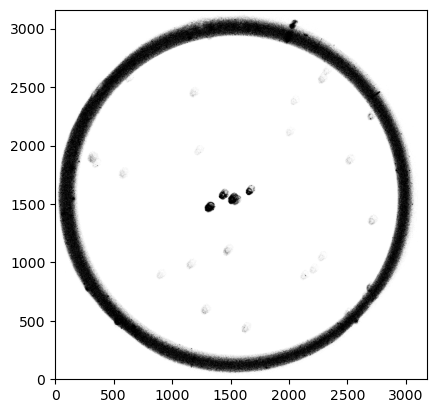

In [5]:
flag_edge_mask = flag_and_edge_mask(
    image_data["CNT"],
    image_data["FLAG"],
    image_data["EDGE"])
plt.imshow(ZScaleInterval()(flag_edge_mask),origin='lower',cmap='Greys')
plt.show()

In [6]:
#image_dict["cnt"] = scipy.sparse.coo_matrix(image_dict["cnt"])
source_table, segment_map, extended_source_paths, extended_source_cat = \
    get_point_and_extended_sources(masked_cnt_image, 'NUV', flag_edge_mask, exptime)

Masking for extended sources.
Running DAO for extended source ID.
Found 6911 peaks with DAO.
6911


/Users/cm/github/gPhoton2/gPhoton/lightcurve/photometry_utils.py:395: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  extended_source_cat = pd.concat([extended_source_cat, extended_hull_data])


Estimating background and threshold.
Calculating source threshold.
Segmenting and deblending point sources.
Checking for extended source overlap with point sources.


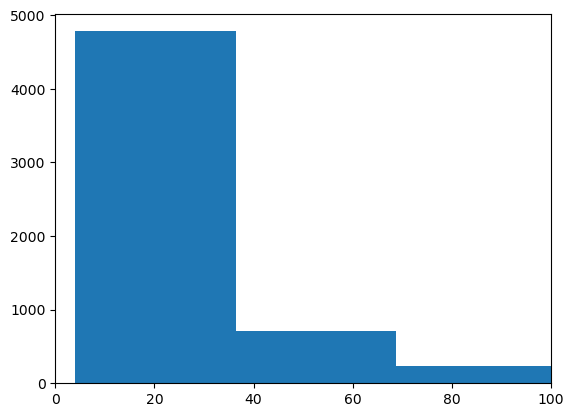

In [17]:
plt.hist(source_table['area'],bins=100)
plt.xlim([0,100])
plt.show()

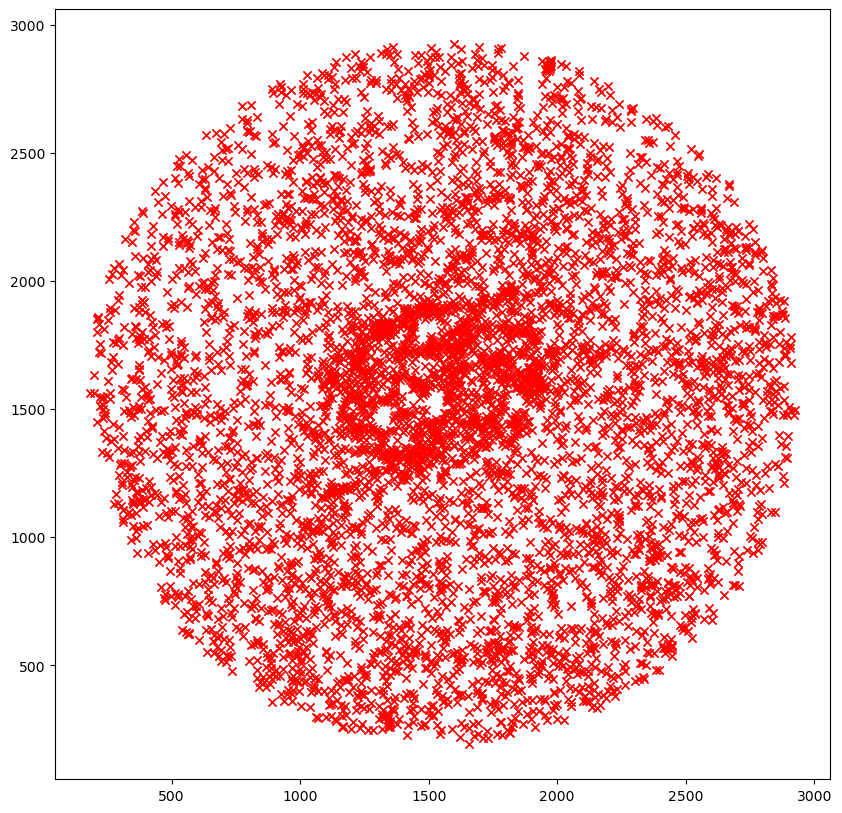

In [11]:
plt.plot(source_table['xcentroid'],source_table['ycentroid'],'rx')
plt.show()

In [7]:
source_table

,xcentroid,ycentroid,area,segment_flux,elongation,eccentricity,equivalent_radius,orientation,max_value,maxval_xindex,maxval_yindex,min_value,minval_xindex,minval_yindex,bbox_xmin,bbox_xmax,bbox_ymin,bbox_ymax,extended_source
label,,,,,,,,,,,,,,,,,,,
1,1654.869060,191.689629,6.0,0.028627,2.382185,0.907625,1.381977,-12.305157,0.006996,1655,191,0.002336,1655,192,1653,1656,191,192,0
2,1710.224255,215.690496,72.0,0.858766,1.488407,0.740679,4.787307,-32.149784,0.053917,1711,215,-0.000041,1705,216,1704,1715,211,220,0
3,1732.522891,215.479125,6.0,0.016942,2.441423,0.912267,1.381977,-71.000055,0.006077,1732,216,0.000754,1733,214,1732,1733,214,217,0
4,1622.070676,221.969147,12.0,0.035697,1.196970,0.549578,1.954410,-61.376467,0.006750,1622,221,-0.000033,1622,220,1621,1624,220,224,0
5,1677.482072,224.296390,28.0,0.101161,1.222620,0.575338,2.985411,-40.540298,0.009106,1677,225,-0.000694,1680,224,1675,1681,222,227,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6109,1958.492153,2826.310158,21.0,0.052312,2.593870,0.922698,2.585441,-85.503729,0.006621,1959,2826,-0.000792,1957,2828,1957,1960,2822,2830,0
6110,1962.633426,2844.772087,86.0,0.228282,1.785563,0.828460,5.232079,77.607480,0.007492,1964,2846,-0.000812,1965,2840,1957,1967,2836,2852,0
6111,1973.571420,2847.547792,24.0,0.063247,1.517086,0.752004,2.763953,-13.122863,0.006820,1975,2847,0.000010,1974,2846,1971,1977,2845,2850,0


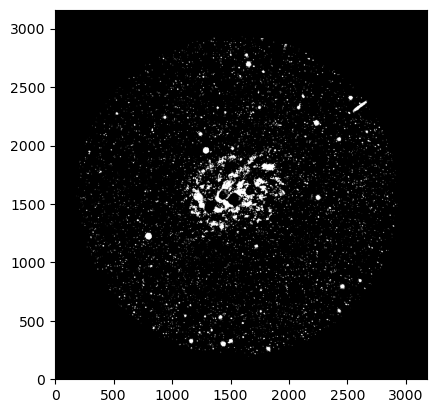

In [8]:
plt.imshow(ZScaleInterval()(segment_map),origin='lower',cmap='Greys_r')
plt.show()

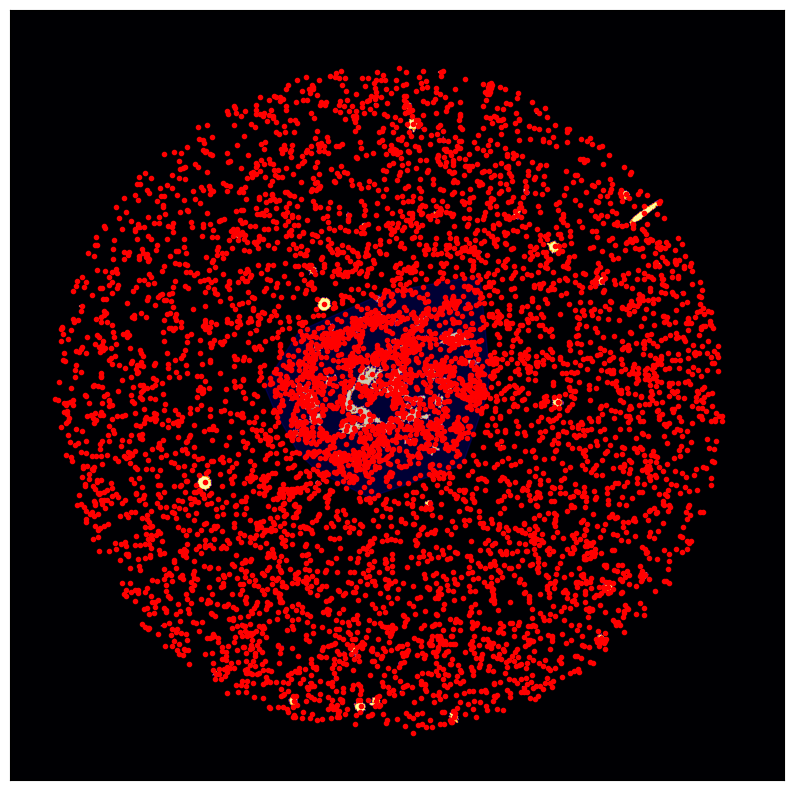

In [21]:
plt.figure(figsize=(10,10))
plt.imshow(ZScaleInterval()(image_data['CNT']),origin='lower',cmap='Greys_r')
plt.imshow(ZScaleInterval()(segment_map),origin='lower',cmap='inferno')
for p in extended_source_paths.keys():
    path = extended_source_paths[p].vertices
    x = np.array(path)[:,0]
    y = np.array(path)[:,1]
    plt.fill(y,x,alpha=0.2,color='b')
plt.plot(source_table['xcentroid'],source_table['ycentroid'],'r.')
plt.xticks([]);plt.yticks([]);
plt.show();